In [28]:
import sys
sys.path.append('..')

import numpy as np
import torch
import matplotlib.pyplot as plt
from imitation_learning.model.modules.harmonics import grid

In [4]:
num_radii = 10
num_phi = 36
max_radius = 1.0
r2d, p2d = grid.polargrid(max_radius, num_radii, num_phi)

In [57]:
r2d.shape

torch.Size([10, 36])

In [58]:
rp.shape

(275, 2)

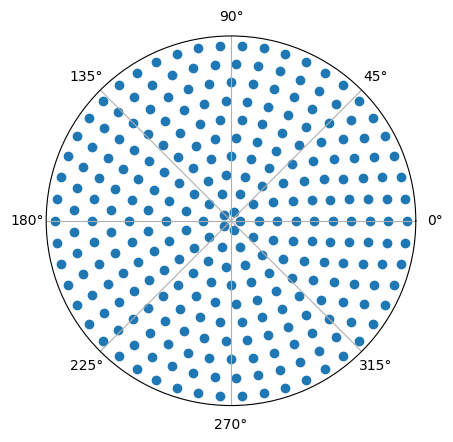

In [54]:
def rtpairs(r, n):
    rt_pairs = []
    for i in range(len(r)):
        ps = (np.arange(n[i]) * (2*np.pi / n[i])).reshape(n[i], 1)
        rs = np.array([r[i]] * n[i]).reshape(n[i],1)
        rt_pairs.extend(np.concatenate((ps,rs), axis=1).tolist())
    return np.array(rt_pairs)
        
T = [5 * i for i in range(1,num_radii+1)]
r_edges, r = grid.grid1D(max_radius, num_radii)
r = r.tolist()
rp = rtpairs(r,T)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(rp[:,0], rp[:,1])
ax.set_rmax(1)
ax.set_rticks([])
ax.grid(True)

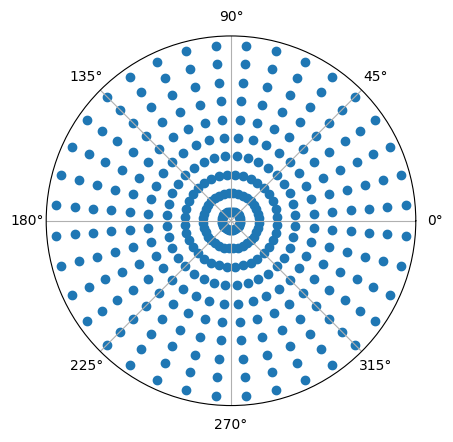

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(p2d, r2d)
ax.set_rmax(1)
ax.set_rticks([])
ax.grid(True)

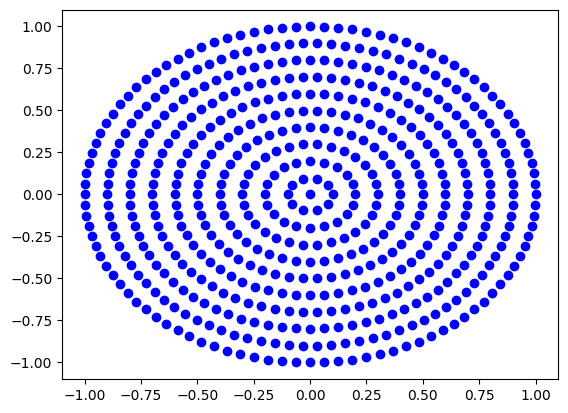

In [56]:
T = [1, 10, 20, 30, 40, 50, 60,70, 80, 90, 100]
R = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9, 1.0]

def rtpairs(r, n):

    for i in range(len(r)):
       for j in range(n[i]):    
        yield r[i], j*(2 * np.pi / n[i])

for r, t in rtpairs(R, T):
    plt.plot(r * np.cos(t), r * np.sin(t), 'bo')
plt.show()